## Churn Prediction (Telecommunication)

### Problem Statement

Improve the Business of Client by retaining the Customers.
There are Three main solutions for improving Business.
1 Acquire new customers, 2 Upsell the existing customers, 3 Increase the retention period of customers.
The cost of getting New Customers is more when compared to retaining a customer.
The Pruposed solution is to predict the customers who are likely to leave or switch to other company i.e, Predict the churn.
This solution helps the client to contact the customer whom we predicted to churn and provide offers to make them stay.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading data
df = pd.read_csv("churn_dataset.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Cleaning

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df["TotalCharges"].value_counts().reset_index()

,index,TotalCharges
0,,11
1,20.2,11
2,19.75,9
3,20.05,8
4,19.9,8
...,...,...
6526,6849.4,1
6527,692.35,1
6528,130.15,1
6529,3211.9,1


In [6]:
df["TotalCharges"]=df["TotalCharges"].apply(lambda x : np.nan if x==" " else x)

In [7]:
df["TotalCharges"].isna().sum()

11

In [33]:
# In TotalCharges we have only 11 null values so we are dropping these null values
df["TotalCharges"].dropna(inplace=True)

# Filling Null Values using KNN

In [8]:
# changing dtypes
df["TotalCharges"]=df["TotalCharges"].astype(np.float64)

In [ ]:
df_cat

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
# cleaning Column wise
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Checking for duplicates
df["customerID"].duplicated().sum()

0

In [12]:
# checking for Null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Cleaning column wise

In [13]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [14]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [15]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [16]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [17]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [18]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
df["MultipleLines"]=df["MultipleLines"].str.replace("No phone service","No")

In [20]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [21]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [22]:
df["OnlineSecurity"]=df["OnlineSecurity"].str.replace("No internet service","No")

In [23]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [24]:
df["OnlineBackup"]=df["OnlineBackup"].str.replace("No internet service","No")

In [25]:
df["OnlineBackup"].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [26]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [27]:
df["DeviceProtection"]=df["DeviceProtection"].str.replace("No internet service","No")

In [28]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [29]:
df["TechSupport"]=df["TechSupport"].str.replace("No internet service","No")

In [30]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [31]:
df["StreamingTV"]=df["StreamingTV"].str.replace("No internet service","No")

In [32]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [33]:
df["StreamingMovies"]=df["StreamingMovies"].str.replace("No internet service","No")

In [39]:
df["StreamingMovies"].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [34]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [35]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [36]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [37]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Filling Null Values using KNNImputer

In [41]:
df_cat = df.select_dtypes("object")
df_num = df.select_dtypes(["int","float"])

In [42]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [43]:
df_num.isna().sum()

SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [44]:
from sklearn.impute import KNNImputer

In [45]:
knn_imp = KNNImputer()

In [46]:
df_num = pd.DataFrame(knn_imp.fit_transform(df_num),index = df_num.index , columns=df_num.columns)

In [47]:
df_num.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [48]:
df_filled = df_cat.merge(df_num,left_index=True,right_index=True)
df_filled.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,No,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,Yes,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,0.0,2.0,70.70,151.65


In [50]:
df_filled.isna().sum()

customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [51]:
df_filled.to_csv("churn_dataset_cleaned.csv")

# Reading Cleaned Data

In [2]:
df_clean = pd.read_csv("churn_dataset_cleaned.csv")

In [3]:
df_clean.head()

,Unnamed: 0,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,No,0.0,1.0,29.85,29.85
1,1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,Yes,0.0,2.0,53.85,108.15
3,3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,0.0,2.0,70.70,151.65


In [4]:
df_clean.drop("Unnamed: 0",axis = 1, inplace=True)

In [5]:
df_clean.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,No,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,Yes,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,0.0,2.0,70.70,151.65


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  Churn             7043 non-null   object 


In [7]:
df_clean.describe(include = "all")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,2,2,2,2,3,2,2,2,...,2,2,3,2,4,2,NaN,NaN,NaN,NaN
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,No,NaN,NaN,NaN,NaN
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,...,4336,4311,3875,4171,2365,5174,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.162147,32.371149,64.761692,2279.802104
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.368612,24.559481,30.090047,2266.727140
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,35.500000,398.550000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,29.000000,70.350000,1394.550000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,55.000000,89.850000,3786.600000


In [8]:
df_clean.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,No,0.0,1.0,29.85,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,Yes,0.0,2.0,53.85,108.15
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,0.0,2.0,70.70,151.65


# Data Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
df_gender = df_clean.groupby(["gender","Churn"]).size().reset_index(name = "count")
df_gender

,gender,Churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


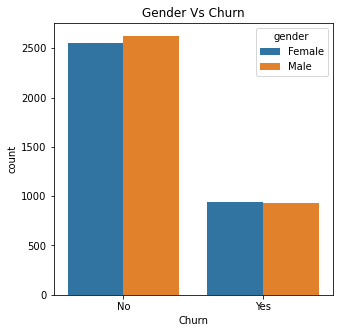

In [12]:
plt.figure(figsize=(5,5))
plt.title("Gender Vs Churn")
sns.barplot(data = df_gender, x = "Churn", y = "count",hue = "gender")
plt.show()

* From the above plot it can be seen that both Male and Female Churn count is same, so it does not have impact on Churn. 


In [13]:
df_tenure = df_clean.groupby(["Contract","Churn"]).size().reset_index(name = "count")
df_tenure

,Contract,Churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


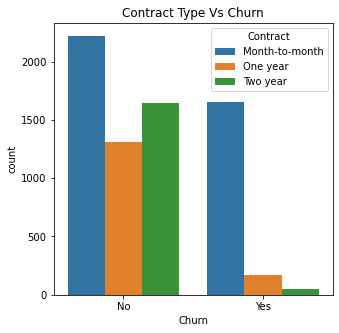

In [14]:
plt.figure(figsize=(5,5))
plt.title("Contract Type Vs Churn")
sns.barplot(data = df_tenure, x = "Churn", y = "count",hue = "Contract")
plt.show()

* From the above plot it can be seen that people who are taking Month-to-month Contract are leaving the client in order to   avoid this company should request them to change to yearly Contract

In [15]:
df_totalcharge = df_clean.groupby(["Churn"])["TotalCharges"].mean().reset_index(name = "count")
df_totalcharge

,Churn,count
0,No,2550.003734
1,Yes,1531.796094


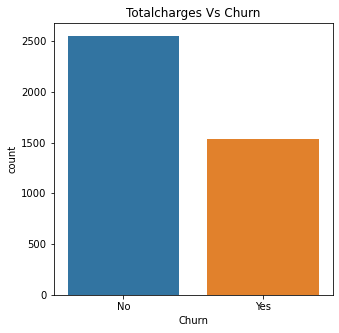

In [16]:
plt.figure(figsize=(5,5))
plt.title("Totalcharges Vs Churn")
sns.barplot(data = df_totalcharge, x = "Churn", y = "count")
plt.show()

* People who spend money less than 1500 are more likely to churn.

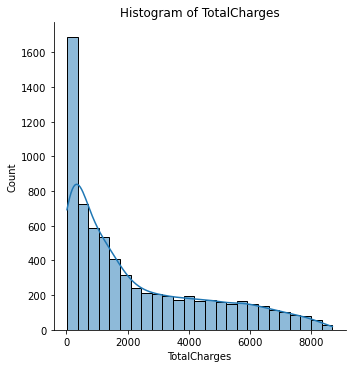

In [17]:
sns.displot(data=df_clean,x='TotalCharges',kde=True)
plt.title('Histogram of TotalCharges')
plt.show()

* From above plot it is observed that people who are spending money less than 500 are more in count.

In [18]:
df_Paymentmode = df_clean.groupby(["PaymentMethod","Churn"]).size().reset_index(name = "count")
df_Paymentmode

,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


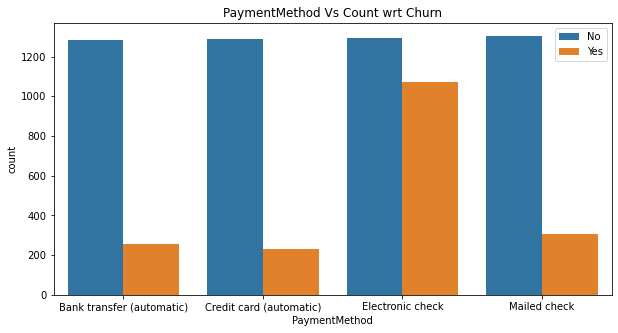

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_Paymentmode,x='PaymentMethod',y='count',hue='Churn')
plt.legend(loc='upper right')
plt.title('PaymentMethod Vs Count wrt Churn')
plt.show()

* From the above plot it is observed that people who pay with Electronic Check are more likely to Churn.

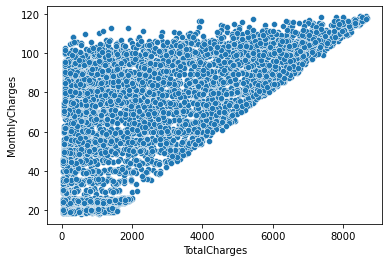

In [20]:
sns.scatterplot(data = df_clean, x = "TotalCharges", y = "MonthlyCharges")
plt.show()

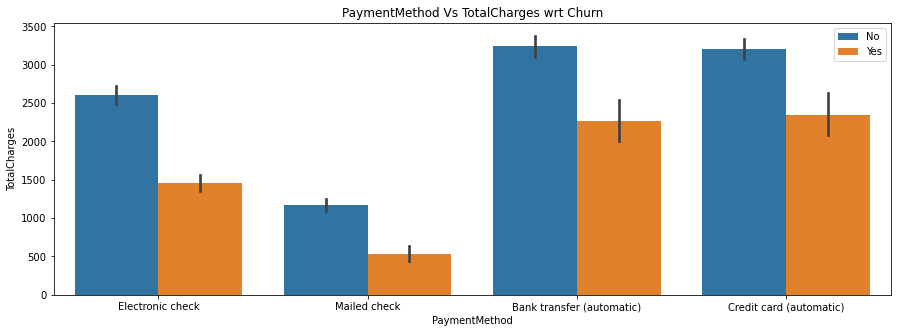

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_clean,x='PaymentMethod',y='TotalCharges',hue='Churn')
plt.legend(loc='upper right')
plt.title('PaymentMethod Vs TotalCharges wrt Churn')
plt.show()

* People who are using payment method as Bank transfer and Credit card are more likely to Churn.

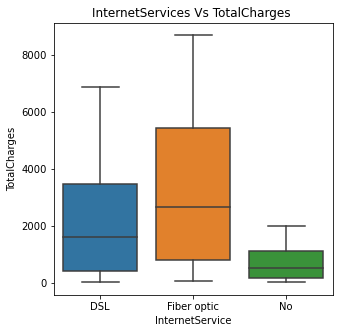

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_clean,x='InternetService',y='TotalCharges')
plt.title('InternetServices Vs TotalCharges ')
plt.show()

* From above plot it is observed that price of Fiber Optic is more when compared to DSL

In [23]:
df_InternetService = df_clean.groupby(["InternetService"])["TotalCharges"].mean().reset_index(name = "count")
df_InternetService

,InternetService,count
0,DSL,2115.554577
1,Fiber optic,3205.304570
2,No,662.690459


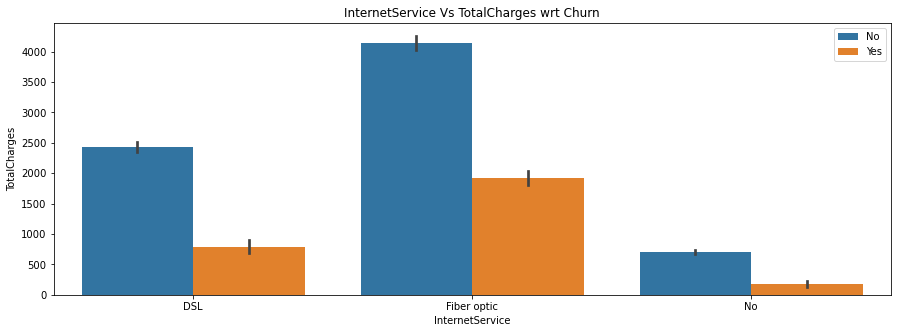

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_clean,x='InternetService',y='TotalCharges',hue='Churn')
plt.legend(loc='upper right')
plt.title('InternetService Vs TotalCharges wrt Churn')
plt.show()

In [25]:
df_SeniorCitizen = df_clean.groupby(["Churn","SeniorCitizen"]).size().reset_index(name = "count")
df_SeniorCitizen

,Churn,SeniorCitizen,count
0,No,0.0,4508
1,No,1.0,666
2,Yes,0.0,1393
3,Yes,1.0,476


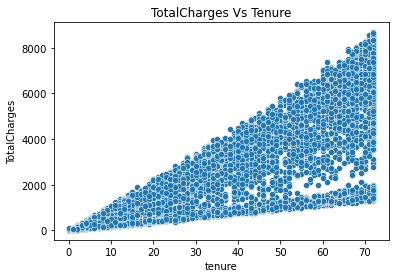

In [26]:
sns.scatterplot(data = df_clean, y = "TotalCharges", x = "tenure")
plt.title("TotalCharges Vs Tenure")
plt.show()

* From above plot it is seen that with increase in Tenure Totalcharges also increases

In [121]:
corr_max = df_clean.corr()

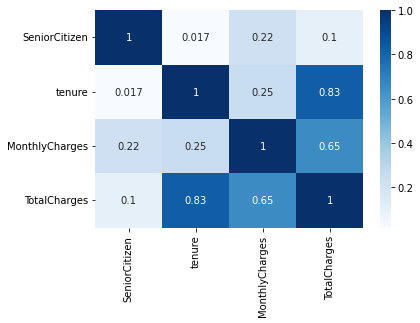

In [122]:
sns.heatmap(corr_max, cmap='Blues', annot=True)
plt.show()

# Splitting data into Train and Test

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [28]:
oe = OneHotEncoder(drop='first',sparse=False)
sc = StandardScaler()

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(df_clean.drop(["customerID","Churn"],axis=1),df_clean["Churn"], test_size = 0.25,\
                                                   random_state=52)

In [30]:
X_train.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5731,Female,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.0,10.0,19.90,199.45
1314,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,0.0,39.0,89.55,3474.45
637,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0.0,68.0,70.90,4911.35
37,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),0.0,46.0,74.80,3548.30
2274,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.0,23.0,99.85,2331.30


In [31]:
X_train_cat = X_train.select_dtypes("object")
X_train_num = X_train.select_dtypes(["int","float"])

In [32]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5731,Female,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1314,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check
637,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic)
37,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
2274,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check


In [33]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5731,0.0,10.0,19.90,199.45
1314,0.0,39.0,89.55,3474.45
637,0.0,68.0,70.90,4911.35
37,0.0,46.0,74.80,3548.30
2274,0.0,23.0,99.85,2331.30


### Performing OneHotEncoding and Standardization

In [34]:
X_train_cat_oe = pd.DataFrame(oe.fit_transform(X_train_cat), index=X_train_cat.index,\
            columns=oe.get_feature_names_out(X_train_cat.columns))
X_train_num_sc = pd.DataFrame(sc.fit_transform(X_train_num) , index = X_train_num.index, columns = X_train_num.columns)

In [35]:
X_train_cat_oe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5731,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1314,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
637,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
37,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2274,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
X_train_num_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5731,-0.442838,-0.919973,-1.505320,-0.924840
1314,-0.442838,0.259251,0.825437,0.516224
637,-0.442838,1.438476,0.201336,1.148488
37,-0.442838,0.543892,0.331845,0.548719
2274,-0.442838,-0.391356,1.170115,0.013215


In [37]:
X_train_processed = X_train_cat_oe.merge(X_train_num_sc,left_index=True,right_index=True)
X_train_processed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5731,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.442838,-0.919973,-1.505320,-0.924840
1314,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.442838,0.259251,0.825437,0.516224
637,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-0.442838,1.438476,0.201336,1.148488
37,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.442838,0.543892,0.331845,0.548719
2274,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.442838,-0.391356,1.170115,0.013215


In [38]:
X_test_cat = X_test.select_dtypes("object")
X_test_num = X_test.select_dtypes(["int","float"])

In [39]:
X_test_cat_oe = pd.DataFrame(oe.transform(X_test_cat), index=X_test_cat.index,\
            columns=oe.get_feature_names_out(X_test_cat.columns))
X_test_num_sc = pd.DataFrame(sc.transform(X_test_num) , index = X_test_num.index, columns = X_test_num.columns)

In [40]:
X_test_cat_oe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3987,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3018,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6432,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6905,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
X_test_num_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3987,-0.442838,-0.879311,0.388734,-0.643888
3018,2.258165,1.397813,-1.331308,-0.276823
6942,2.258165,1.438476,-1.501973,-0.398335
6432,-0.442838,0.096599,-0.129956,-0.075162
6905,-0.442838,-0.106715,-0.682109,-0.437145


In [42]:
X_test_processed = X_test_cat_oe.merge(X_test_num_sc,left_index=True,right_index=True)
X_test_processed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3987,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.442838,-0.879311,0.388734,-0.643888
3018,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.258165,1.397813,-1.331308,-0.276823
6942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2.258165,1.438476,-1.501973,-0.398335
6432,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.442838,0.096599,-0.129956,-0.075162
6905,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.442838,-0.106715,-0.682109,-0.437145


# Building Model using KNN Algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)

### Training Model Using X_train and Y_train

In [45]:
knn.fit(X_train_processed,Y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(X_test_processed)

In [47]:
pd.crosstab(Y_test, y_pred, rownames=["real"] , colnames=["Predicted"])

Predicted,No,Yes
real,,
No,1084,196
Yes,220,261


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [49]:
knn_acc = accuracy_score(Y_test,y_pred)*100
knn_acc

76.37705848949462

In [50]:
knn_pre=precision_score(Y_test,y_pred,pos_label="Yes",average="binary")*100
knn_pre

57.11159737417943

In [51]:
knn_re=recall_score(Y_test,y_pred,pos_label="Yes",average = "binary")*100
knn_re

54.26195426195426

In [52]:
confusion_matrix(Y_test,y_pred)

array([[1084,  196],
       [ 220,  261]], dtype=int64)

# Finding Best K value

In [53]:
accuracy_KNN = []
for i in range(1,31):
    knn_alg = KNeighborsClassifier(n_neighbors=i)
    knn_alg.fit(X_train_processed,Y_train)
    y_pred_alg = knn_alg.predict(X_test_processed)
    accuracy_KNN.append(accuracy_score(Y_test,y_pred_alg)) 

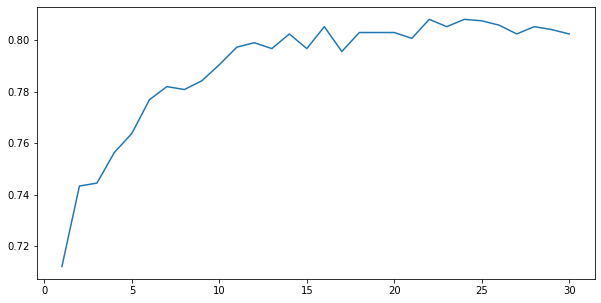

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(1,31),y=accuracy_KNN)
plt.show()

In [55]:
max(accuracy_KNN)

0.8080636002271436

In [56]:
k_value = {}
for i in range(len(accuracy_KNN)):
    k_value[i+1] = accuracy_KNN[i]
print(k_value)

{1: 0.7120954003407155, 2: 0.7433276547416241, 3: 0.7444633730834753, 4: 0.7563884156729132, 5: 0.7637705848949461, 6: 0.7768313458262351, 7: 0.7819420783645656, 8: 0.7808063600227144, 9: 0.7842135150482681, 10: 0.7904599659284497, 11: 0.797274275979557, 12: 0.7989778534923339, 13: 0.7967064168086314, 14: 0.8023850085178875, 15: 0.7967064168086314, 16: 0.8052243043725156, 17: 0.7955706984667802, 18: 0.8029528676888131, 19: 0.8029528676888131, 20: 0.8029528676888131, 21: 0.8006814310051107, 22: 0.8080636002271436, 23: 0.8052243043725156, 24: 0.8080636002271436, 25: 0.807495741056218, 26: 0.8057921635434412, 27: 0.8023850085178875, 28: 0.8052243043725156, 29: 0.8040885860306644, 30: 0.8023850085178875}


In [57]:
max(k_value.values())

0.8080636002271436

# Building Model using Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X_train_processed,Y_train)
y_pred_lr = lr.predict(X_test_processed)
pd.crosstab(Y_test, y_pred_lr, rownames=["real"] , colnames=["Predicted"])

Predicted,No,Yes
real,,
No,1142,138
Yes,197,284


In [94]:
feature_weights = pd.DataFrame(lr.coef_, columns=X_test_processed.columns)
feature_weights
df_lr = pd.DataFrame({"Features":feature_weights.columns,"Weights":feature_weights.iloc[0]})
df_lr.sort_values("Weights",ascending=False,inplace=True)

In [63]:
lr_acc = accuracy_score(Y_test,y_pred_lr)*100
lr_acc

80.97671777399205

In [64]:
lr_pre=precision_score(Y_test,y_pred_lr,pos_label="Yes",average="binary")*100
lr_pre

67.29857819905213

In [65]:
lr_re=recall_score(Y_test,y_pred_lr,pos_label="Yes",average = "binary")*100
lr_re

59.04365904365905

# Building Model using Support Vector Machines

In [66]:
from sklearn.svm import SVC

In [67]:
svm = SVC()

In [68]:
svm.fit(X_train_processed,Y_train)

SVC()

In [69]:
y_pred_SVC = svm.predict(X_test_processed)
pd.crosstab(Y_test, y_pred_SVC, rownames=["real"] , colnames=["Predicted"])

Predicted,No,Yes
real,,
No,1175,105
Yes,243,238


In [70]:
svm_acc = accuracy_score(Y_test,y_pred_SVC)*100
svm_acc

80.23850085178876

In [71]:
svm_pre=precision_score(Y_test,y_pred_SVC,pos_label="Yes",average="binary")*100
svm_pre

69.38775510204081

In [72]:
svm_re=recall_score(Y_test,y_pred_SVC,pos_label="Yes",average = "binary")*100
svm_re

49.48024948024948

# Building Model using Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier()
dt.fit(X_train_processed,Y_train)
y_pred_dt = dt.predict(X_test_processed)
pd.crosstab(Y_test, y_pred_dt, rownames=["real"] , colnames=["Predicted"])

Predicted,No,Yes
real,,
No,1029,251
Yes,254,227


In [75]:
dt_acc = accuracy_score(Y_test,y_pred_dt)*100
dt_acc

71.32311186825667

In [76]:
dt_pre=precision_score(Y_test,y_pred_dt,pos_label="Yes",average="binary")*100
dt_pre

47.48953974895397

In [77]:
dt_re=recall_score(Y_test,y_pred_dt,pos_label="Yes",average = "binary")*100
dt_re

47.19334719334719

# Building Model using RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train_processed,Y_train)
y_pred_rf = rf.predict(X_test_processed)
pd.crosstab(Y_test, y_pred_rf, rownames=["real"] , colnames=["Predicted"])

Predicted,No,Yes
real,,
No,1163,117
Yes,252,229


In [80]:
rf_acc = accuracy_score(Y_test,y_pred_rf)*100
rf_acc

79.04599659284497

In [81]:
rf_pre=precision_score(Y_test,y_pred_rf,pos_label="Yes",average="binary")*100
rf_pre

66.1849710982659

In [82]:
rf_re=recall_score(Y_test,y_pred_rf,pos_label="Yes",average = "binary")*100
rf_re

47.60914760914761

# Comparing Accuracy for Different Algorithms

In [83]:
accuracy_lst = [knn_acc,lr_acc,svm_acc,dt_acc,rf_acc]
algorithm = ["KNN","Logistic Regression","SVM","DecisionTree","RandomForest"]
accuracy_lst

[76.37705848949462,
 80.97671777399205,
 80.23850085178876,
 71.32311186825667,
 79.04599659284497]

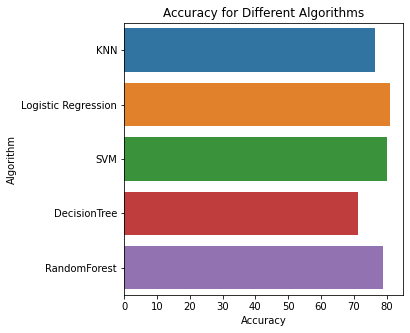

In [110]:
plt.figure(figsize=(5,5))
sns.barplot(x = accuracy_lst,y = algorithm)
plt.title("Accuracy for Different Algorithms")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.show()

* From above Bar Plot it is observed that Logistic Regression has Highest Accuracy i.e, 80.9 %  Accuracy.

In [119]:
fig = px.bar(x=accuracy_lst, y=algorithm,color=algorithm,hover_name=algorithm,width=700, height=400,\
            labels={'x':'Accuracy',"y":"Algorithm"})
fig.show()

In [86]:
df_algo = pd.DataFrame({"Algorithm":["KNN","Logistic Regression","SVM","DecisionTree","RandomForest"],\
           "Accuracy":[knn_acc,lr_acc,svm_acc,dt_acc,rf_acc],
           "Precision":[knn_pre,lr_pre,svm_pre,dt_pre,rf_pre],\
           "Recall":[knn_re,lr_re,svm_re,dt_re,rf_re]})

In [87]:
df_algo

,Algorithm,Accuracy,Precision,Recall
0,KNN,76.377058,57.111597,54.261954
1,Logistic Regression,80.976718,67.298578,59.043659
2,SVM,80.238501,69.387755,49.480249
3,DecisionTree,71.323112,47.489540,47.193347
4,RandomForest,79.045997,66.184971,47.609148


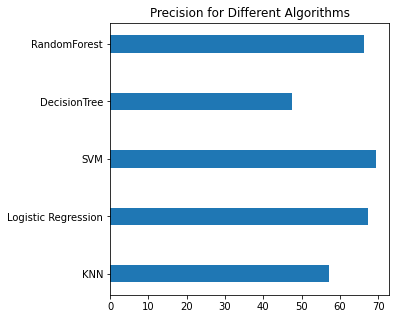

In [109]:
plt.figure(figsize=(5,5))
plt.barh(df_algo["Algorithm"],df_algo["Precision"],height=0.3)
plt.title("Precision for Different Algorithms")
plt.show()

* From above BarPlot it is obseved that SVM has highest Precision i.e, 69.4 % .

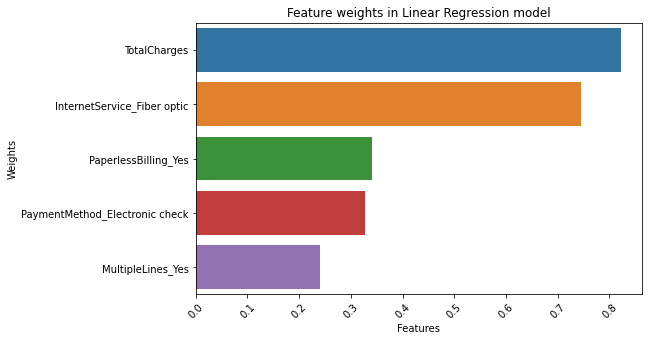

In [107]:
plt.figure(figsize=(8,5))
sns.barplot(y=df_lr["Features"].head(5), x=df_lr["Weights"])
plt.title("Feature weights in Linear Regression model")
plt.xlabel("Features")
plt.ylabel("Weights")
plt.xticks(rotation=45)
plt.show()

# Summary

* Looking at model results, the best accuracy on the data set is achieved by the Logistic Regression with 80.976718.
* TotalCharges is the main feature that leads for customer to Churn.
* InternetService_Fiber optic is second feature that leads to Churn. 
* In a telecom churn prediction scenario where the logistic regression model has achieved high accuracy, it means that the model is able to accurately predict which customers are likely to churn and which are not, based on the input features used in the model. High accuracy is an important metric in churn prediction, as it helps telecom companies to identify at-risk customers early and take proactive measures to retain them.
* The logistic regression model is trained on given dataset of telecom customer data, where the data is preprocessed and cleaned to remove missing values and outliers. The model is then evaluated on a test dataset to measure its performance in accurately predicting churn.
* Overall, high accuracy for a logistic regression model in telecom churn prediction is a positive outcome, as it indicates that the model can provide valuable insights to telecom companies to help them reduce customer churn and improve customer satisfaction.